In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/인공지능/diabetes.csv")

In [28]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
features.isnull().sum()# 결측치 제거

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
X = features[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Outcome']]
X.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  Outcome
0            57       60             0              0        0          1
             67       76             0              0        0          1
5            103      108            37             0        0          1
             104      74             0              0        0          1
             105      72             29             325      0          1
                                                                       ..
2            84       50             23             76       0          1
             85       65             0              0        0          1
             87       0              23             0        0          1
                      58             16             52       0          1
17           163      72             41             114      1          1
Length: 768, dtype: int64

In [32]:
y = features['BMI']
y.value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

Text(0.5, 1.0, 'features')

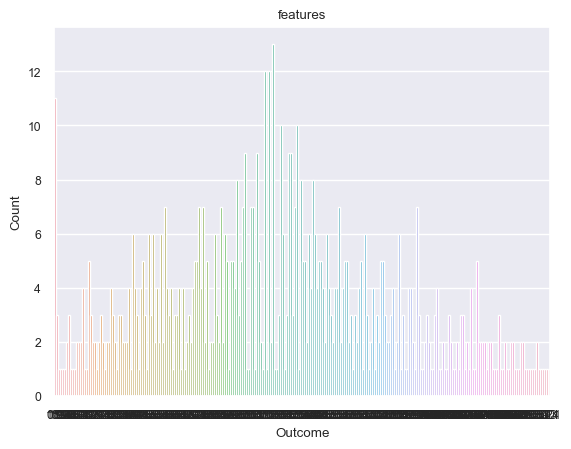

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = X, x=y)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("features")

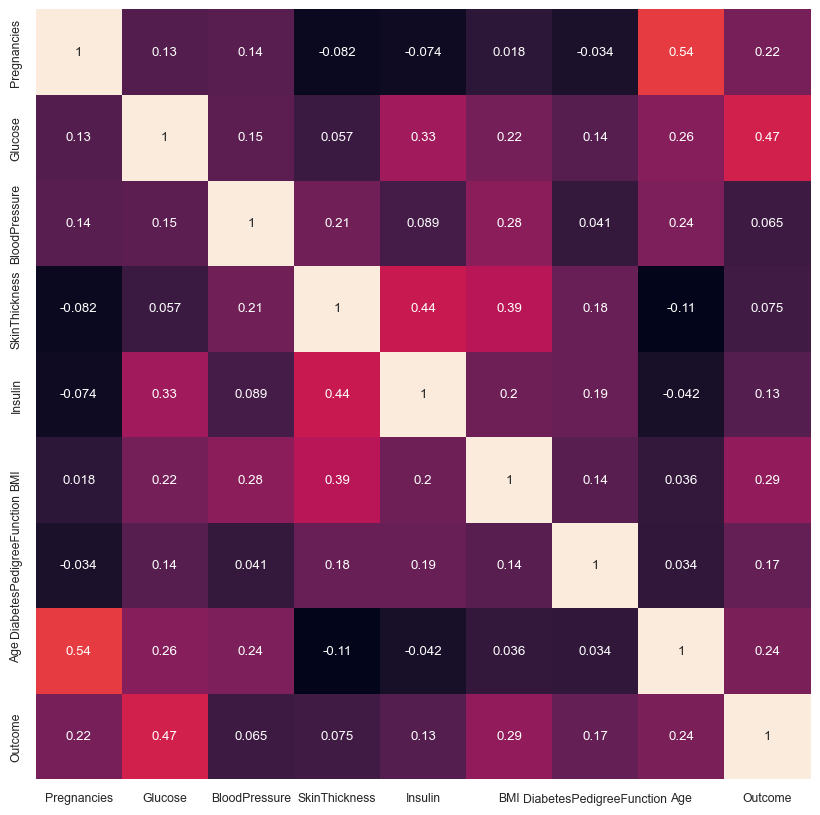

In [34]:
#상관 관계 행렬
df_corr=features.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [51]:
#Splitting the data into training and test test
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [56]:
X_train.shape

(614, 8)

In [57]:
y_train.shape

(614, 2)

In [55]:
#Defining the model 

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
 

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(8,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 44)                396       
                                                                 
 dense_41 (Dense)            (None, 20)                900       
                                                                 
 dense_42 (Dense)            (None, 16)                336       
                                                                 
 dense_43 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


In [49]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6684 - accuracy: 0.6401 - val_loss: 0.6145 - val_accuracy: 0.6948
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6401 - val_loss: 0.6303 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6401 - val_loss: 0.6193 - val_accuracy: 0.6948
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6401 - val_loss: 0.6176 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6401 - val_loss: 0.6269 - val_accuracy: 0.6948
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6401 - val_loss: 0.6192 - val_accuracy: 0.6948
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.6401 - val_loss: 0.6203 - val_accuracy: 0.6948
Epoch 8/100
2

Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6401 - val_loss: 0.6226 - val_accuracy: 0.6948
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6401 - val_loss: 0.6238 - val_accuracy: 0.6948
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6401 - val_loss: 0.6207 - val_accuracy: 0.6948
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6401 - val_loss: 0.6244 - val_accuracy: 0.6948
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6401 - val_loss: 0.6189 - val_accuracy: 0.6948
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6401 - val_loss: 0.6199 - val_accuracy: 0.6948
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6401 - val_loss: 0.6227 - val_accuracy: 0.6948
Epoch 

In [46]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

[[107   0]
 [ 47   0]]


C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
